In [119]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sn

In [32]:
#load dataset
df = pd.read_csv("listings.csv")
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20200824024753,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,...,10.0,9.0,9.0,NaN,t,2,2,0,0,1.51
1,13913,https://www.airbnb.com/rooms/13913,20200824024753,2020-08-27,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/ffb507b7-983c...,54730,https://www.airbnb.com/users/show/54730,...,10.0,9.0,9.0,NaN,f,3,1,2,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20200824024753,2020-08-26,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,10.0,10.0,9.0,NaN,t,1,1,0,0,0.68
3,17402,https://www.airbnb.com/rooms/17402,20200824024753,2020-08-27,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,9.0,10.0,9.0,NaN,t,14,14,0,0,0.37
4,17506,https://www.airbnb.com/rooms/17506,20200824024753,2020-08-26,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74181,45088408,https://www.airbnb.com/rooms/45088408,20200824024753,2020-08-27,Easy access into Central London,5 Minutes walk to Surrey Quays overground stat...,NaN,https://a0.muscache.com/pictures/d96c538e-18ab...,133104947,https://www.airbnb.com/users/show/133104947,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
74182,45088653,https://www.airbnb.com/rooms/45088653,20200824024753,2020-08-27,Wonderful House in West London,Lovely 4 bedrooms house very well located betw...,NaN,https://a0.muscache.com/pictures/7362fbde-532a...,37676062,https://www.airbnb.com/users/show/37676062,...,NaN,NaN,NaN,NaN,t,6,6,0,0,NaN
74183,45088660,https://www.airbnb.com/rooms/45088660,20200824024753,2020-08-26,Stunning Garden Flat in Fashionable West London,"Charming bright airy garden flat, a short dist...",NaN,https://a0.muscache.com/pictures/2995c2cb-ed7e...,78991685,https://www.airbnb.com/users/show/78991685,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
74184,45089002,https://www.airbnb.com/rooms/45089002,20200824024753,2020-08-27,North London accomodation,Its clean house friendly flat mates special fo...,NaN,https://a0.muscache.com/pictures/57a4661a-c338...,193433613,https://www.airbnb.com/users/show/193433613,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [3]:
df.shape

(74186, 74)

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20200824024753,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,...,10.0,9.0,9.0,NaN,t,2,2,0,0,1.51
1,13913,https://www.airbnb.com/rooms/13913,20200824024753,2020-08-27,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/ffb507b7-983c...,54730,https://www.airbnb.com/users/show/54730,...,10.0,9.0,9.0,NaN,f,3,1,2,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20200824024753,2020-08-26,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,10.0,10.0,9.0,NaN,t,1,1,0,0,0.68
3,17402,https://www.airbnb.com/rooms/17402,20200824024753,2020-08-27,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,9.0,10.0,9.0,NaN,t,14,14,0,0,0.37
4,17506,https://www.airbnb.com/rooms/17506,20200824024753,2020-08-26,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN


In [5]:
df.tail()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
74181,45088408,https://www.airbnb.com/rooms/45088408,20200824024753,2020-08-27,Easy access into Central London,5 Minutes walk to Surrey Quays overground stat...,NaN,https://a0.muscache.com/pictures/d96c538e-18ab...,133104947,https://www.airbnb.com/users/show/133104947,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
74182,45088653,https://www.airbnb.com/rooms/45088653,20200824024753,2020-08-27,Wonderful House in West London,Lovely 4 bedrooms house very well located betw...,NaN,https://a0.muscache.com/pictures/7362fbde-532a...,37676062,https://www.airbnb.com/users/show/37676062,...,NaN,NaN,NaN,NaN,t,6,6,0,0,NaN
74183,45088660,https://www.airbnb.com/rooms/45088660,20200824024753,2020-08-26,Stunning Garden Flat in Fashionable West London,"Charming bright airy garden flat, a short dist...",NaN,https://a0.muscache.com/pictures/2995c2cb-ed7e...,78991685,https://www.airbnb.com/users/show/78991685,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
74184,45089002,https://www.airbnb.com/rooms/45089002,20200824024753,2020-08-27,North London accomodation,Its clean house friendly flat mates special fo...,NaN,https://a0.muscache.com/pictures/57a4661a-c338...,193433613,https://www.airbnb.com/users/show/193433613,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
74185,45090395,https://www.airbnb.com/rooms/45090395,20200824024753,2020-08-26,luxury 1 bedroom flat,luxury 1 bedroom apartment in the heart of lon...,NaN,https://a0.muscache.com/pictures/48bdf8b6-4868...,361378737,https://www.airbnb.com/users/show/361378737,...,NaN,NaN,NaN,NaN,f,14,13,1,0,NaN


In [160]:
#description of analysis
'''
This is an exploratory project to analyze publicly available London Airbnb data. 
In particular the analysis focuses on:
Identifying the most expensive Airbnb areas in London
Identifying price discrepancies within areas
Identifying amenities that are associated with high and low priced listings
Building a linear model used for data modeling to predict the advertised price
'''

'\nThis is an exploratory project to analyze publicly available London Airbnb data. \nIn particular the analysis focuses on:\nIdentifying the most expensive Airbnb areas in London\nIdentifying price discrepancies within areas\nIdentifying amenities that are associated with high and low priced listings\nBuilding a linear model to predict the advertised price\n'

In [9]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [33]:
prices = df[['price']]
prices.head()

,price
0,$87.00
1,$49.00
2,$75.00
3,$208.00
4,$150.00


In [41]:
#Data EXploration and Cleaning

In [37]:
#convert a price value in a DataFrame from a string format to a numeric format

def price_to_numeric(value):
    
    if isinstance(value, str):  # Check if the value is a string
        return float(value.replace('$', '').replace(',', ''))
    return float(value)  # Handle cases where the value is already a number


In [38]:
#apply function
df['price'] = df['price'].apply(price_to_numeric)

In [39]:
prices = df[['price']]
prices.head()

,price
0,87.0
1,49.0
2,75.0
3,208.0
4,150.0


In [42]:
prices = df[['host_response_rate']]
prices.head()

,host_response_rate
0,NaN
1,80%
2,100%
3,100%
4,NaN


In [43]:
prices = df[['host_acceptance_rate']]
prices.head()

,host_acceptance_rate
0,100%
1,88%
2,100%
3,99%
4,NaN


In [47]:

def rate_to_numeric(row, col):
    '''Converts the host response rate and acceptance rate columns to numeric'''
    value = row[col]
    if pd.isna(value):  # Use pd.isna to check for NaN values
        return np.nan
    elif isinstance(value, str):  # Check if the value is a string
        return float(value.replace('%', ''))
    else:  # Assume the value is already numeric
        return float(value)


In [48]:
df['host_response_rate'] = df.apply(lambda row: rate_to_numeric(row, 'host_response_rate'), axis=1)
df['host_acceptance_rate'] = df.apply(lambda row: rate_to_numeric(row, 'host_acceptance_rate'), axis=1)


In [49]:
hrr = df[['host_response_rate']]
hrr.head()

,host_response_rate
0,NaN
1,80.0
2,100.0
3,100.0
4,NaN


In [50]:
har = df[['host_acceptance_rate']]
har.head()

,host_acceptance_rate
0,100.0
1,88.0
2,100.0
3,99.0
4,NaN


In [ ]:
#Check Nulls

In [51]:
print_all(df.isna().sum().sort_values(ascending=False))

neighbourhood_group_cleansed                    74186
bathrooms                                       74186
calendar_updated                                74186
license                                         74186
host_response_time                              36406
host_response_rate                              36406
host_about                                      31694
neighborhood_overview                           26981
neighbourhood                                   26979
host_acceptance_rate                            22590
review_scores_checkin                           21990
review_scores_value                             21988
review_scores_location                          21987
review_scores_accuracy                          21951
review_scores_communication                     21950
review_scores_cleanliness                       21942
review_scores_rating                            21901
last_review                                     20283
reviews_per_month           

In [52]:
cols_to_drop = df.columns[df.isna().all()].to_list()
df = df.drop(columns = cols_to_drop )

In [55]:
# Drop columns because all NA
print_all(df.isna().sum().sort_values(ascending=False))

host_response_time                              36406
host_response_rate                              36406
host_about                                      31694
neighborhood_overview                           26981
neighbourhood                                   26979
host_acceptance_rate                            22590
review_scores_checkin                           21990
review_scores_value                             21988
review_scores_location                          21987
review_scores_accuracy                          21951
review_scores_communication                     21950
review_scores_cleanliness                       21942
review_scores_rating                            21901
first_review                                    20283
reviews_per_month                               20283
last_review                                     20283
host_neighbourhood                              17626
bedrooms                                         4592
description                 

In [67]:
#drop columns that will not used in this analysis like urls,text,metadat

In [64]:
cols_to_drop = ['id', 'listing_url', 'scrape_id', 'name', 'description',
                'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
                'host_name', 'host_since', 'host_location', 'host_about',
                'host_thumbnail_url', 'host_picture_url',
                'neighbourhood', 'calendar_last_scraped',
               'host_neighbourhood','host_verifications',]

# Check existing columns
existing_columns = df.columns.tolist()

# Identify missing columns
missing_columns = [col for col in cols_to_drop if col not in existing_columns]

# Update the columns to drop
cols_to_drop = [col for col in cols_to_drop if col in existing_columns]

df = df.drop(columns = cols_to_drop )

In [65]:
df.columns

Index(['last_scraped', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
    

In [68]:
df.shape

(74186, 51)

In [70]:
#identify columns by type
list(df.dtypes.unique())

[dtype('O'), dtype('float64'), dtype('int64')]

In [71]:
cat_cols = df.dtypes[df.dtypes == 'O'].index.to_list()
num_cols = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64') ].index.to_list()

In [73]:
cat_cols

['last_scraped',
 'host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'has_availability',
 'first_review',
 'last_review',
 'instant_bookable']

In [74]:
num_cols

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

In [75]:
df.columns

Index(['last_scraped', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
    

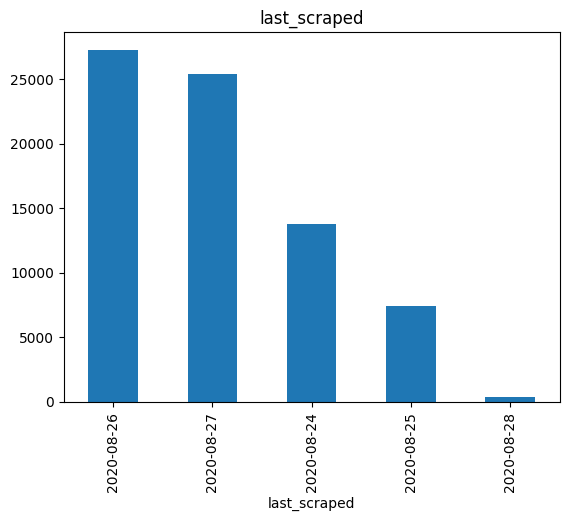

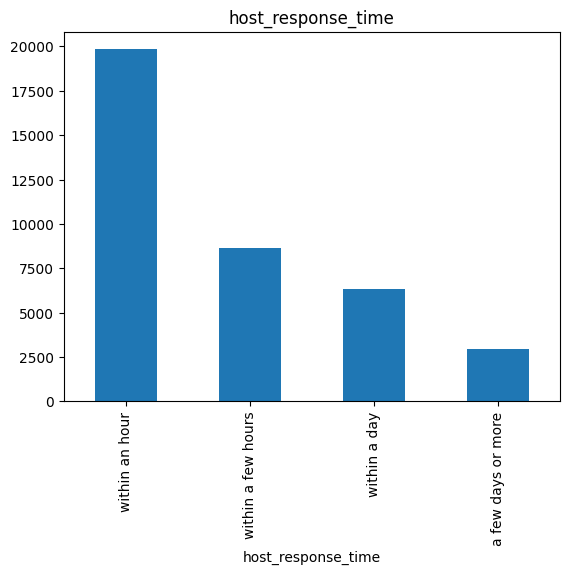

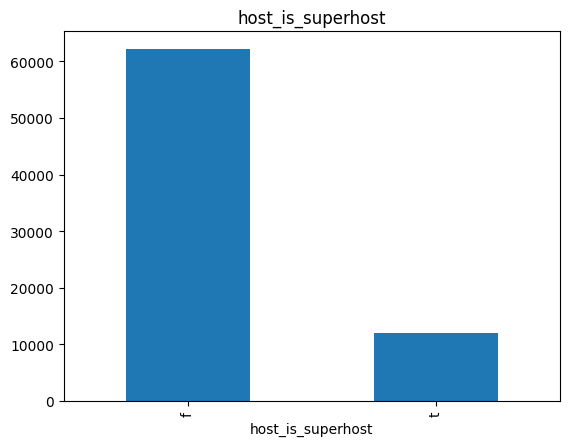

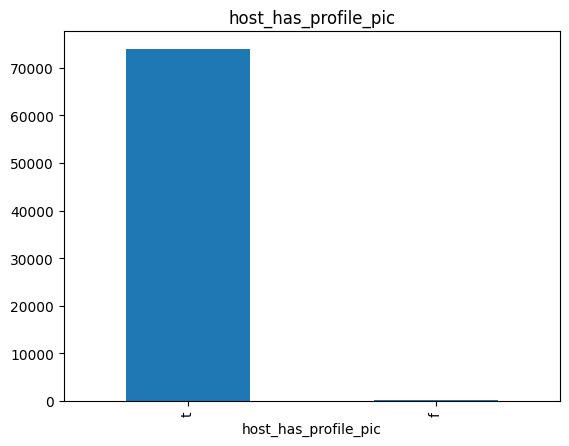

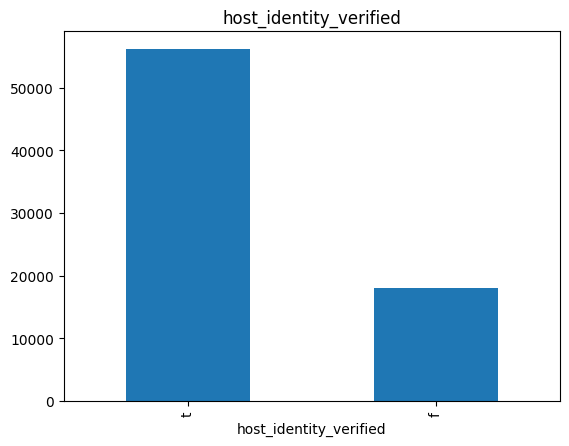

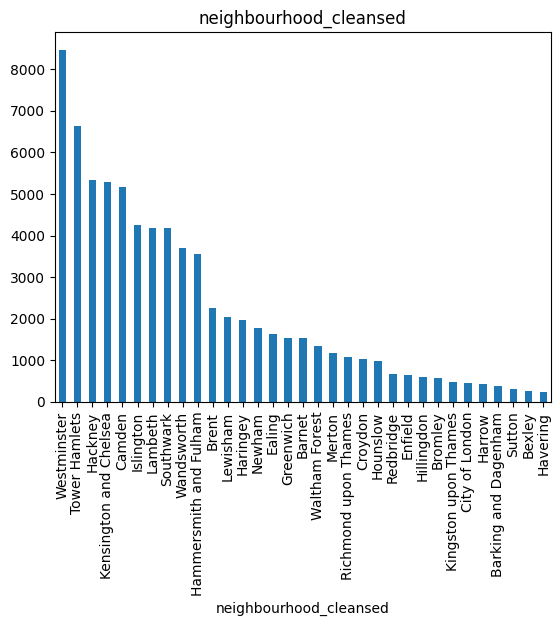

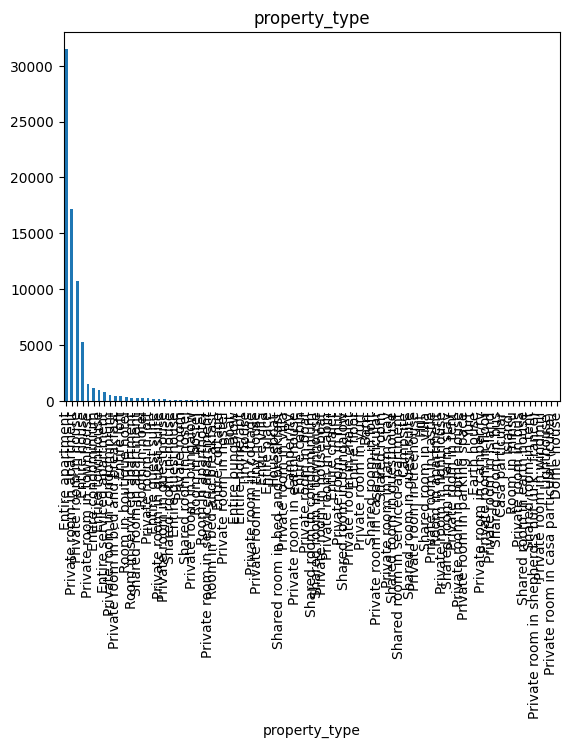

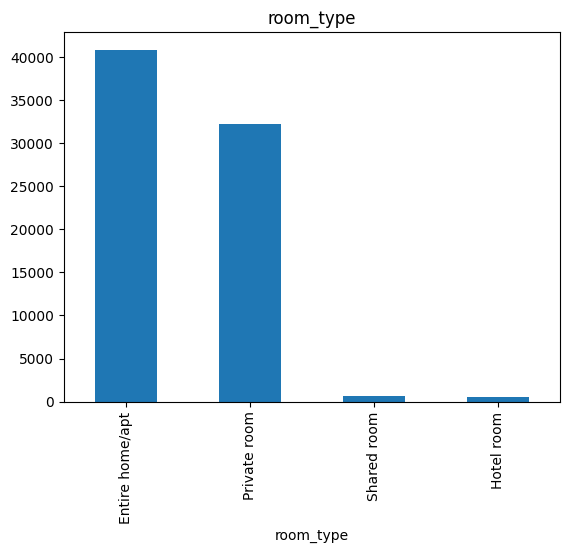

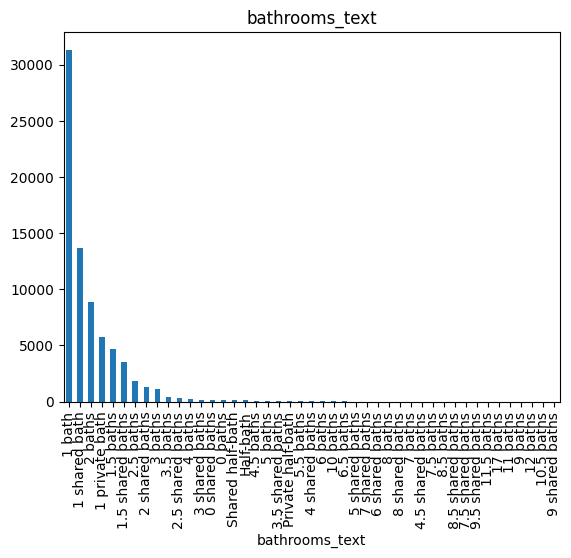

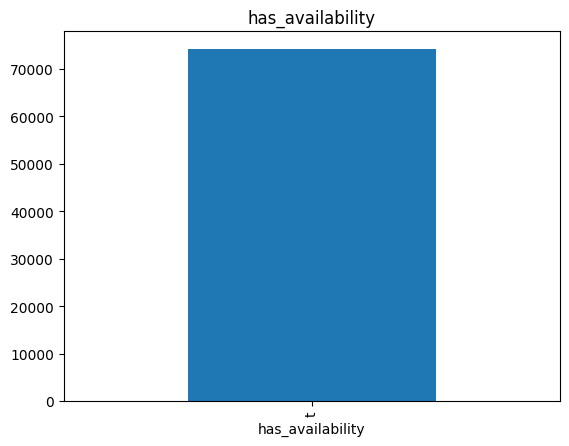

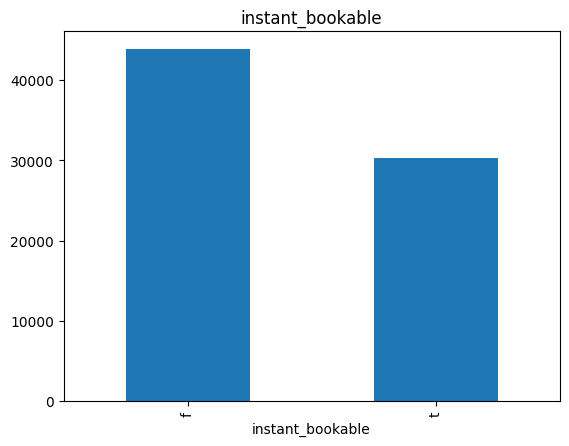

In [79]:
# visualize the distribution of values in categorical columns of a DataFrame
for col in cat_cols:
    if col not in ['amenities', 'last_review', 'first_review']: #unique values, continuous data not suitable for ploting
        df[col].value_counts().plot(kind = 'bar', title = col)
        plt.show()

In [85]:
#property_type group the data
propertytype = df[['property_type']]
propertytype.head()

,property_type
0,Entire apartment
1,Private room in apartment
2,Entire apartment
3,Entire apartment
4,Private room in bed and breakfast


In [86]:
print_all(df['property_type'].value_counts())

property_type
Entire apartment                                 31461
Private room in apartment                        17146
Private room in house                            10757
Entire house                                      5317
Private room in townhouse                         1539
Entire condominium                                1164
Entire townhouse                                   966
Entire serviced apartment                          838
Private room in condominium                        587
Private room in bed and breakfast                  458
Entire loft                                        434
Room in boutique hotel                             394
Room in serviced apartment                         314
Shared room in apartment                           277
Room in hotel                                      257
Private room in loft                               246
Entire guest suite                                 177
Private room in guest suite                        

In [88]:
print_all(df['property_type'].value_counts(normalize=True)) #normalization return relative frequency of data(proportions / percentages)

property_type
Entire apartment                                 0.424083
Private room in apartment                        0.231122
Private room in house                            0.145000
Entire house                                     0.071671
Private room in townhouse                        0.020745
Entire condominium                               0.015690
Entire townhouse                                 0.013021
Entire serviced apartment                        0.011296
Private room in condominium                      0.007913
Private room in bed and breakfast                0.006174
Entire loft                                      0.005850
Room in boutique hotel                           0.005311
Room in serviced apartment                       0.004233
Shared room in apartment                         0.003734
Room in hotel                                    0.003464
Private room in loft                             0.003316
Entire guest suite                               0.002386


In [91]:
#replacing various specific property_type descriptions with broader categories such as 'apartment' and 'house' 
df.property_type.replace({'Entire apartment': 'apartment',
                                    'Private room in apartment': 'apartment',
                                    'Private room in house': 'house',
                                    'Entire house': 'house',
                                    'Private room in townhouse': 'house',
                                    'Entire townhouse': 'house',
                                    'Entire serviced apartment': 'apartment',
                                    'Room in serviced apartment': 'apartment',
                                    'Shared room in house': 'house' ,
                                    'Private room in serviced apartment':'apartment',
                                    'Entire cottage':'house',
                                    'Entire bungalow':'house',
                                    'Tiny house':'house',
                                    'Private room in tiny house':'house',
                                      'Entire villa':'house',
                                      'Private room in villa':'house',
                                      'Private room in earth house':'house',
                                    }, inplace=True)

In [94]:
# identifies all rows where the property_type is neither 'house' nor 'apartment'
df.loc[~df.property_type.isin(['house', 'apartment']), 'property_type'] = 'other'

In [95]:
propertytype = df[['property_type']]
propertytype.head()

,property_type
0,apartment
1,apartment
2,apartment
3,apartment
4,other


In [103]:
#fixing dates
def string_to_datetime(row, col):
    '''Convers any string dates to datetime'''
    
    if row[col] is not np.nan:
        return datetime.strptime(row[col], '%Y-%m-%d')
    else:
        return row[col]

In [100]:
df['last_scraped'] = df.apply(string_to_datetime, col = 'last_scraped', axis=1)
df['first_review'] = df.apply(string_to_datetime, col = 'first_review', axis=1)
df['last_review'] = df.apply(string_to_datetime, col = 'last_review', axis=1)

In [101]:
df['days_from_first_review'] = df['last_scraped'] - df['first_review'] 
df['days_from_first_review'] = df['days_from_first_review'].apply(lambda x: x.days)

df['days_from_last_review'] = df['last_scraped'] - df['last_review'] 
df['days_from_last_review'] = df['days_from_last_review'].apply(lambda x: x.days)

In [104]:
#represent the number of days since the last review and the number of days since the first review for items
print('Min days from last review: ',df['days_from_last_review'].min())
print('Max days from last review: ' ,df['days_from_last_review'].max())
print('')
print('Min days from first review: ',df['days_from_first_review'].min())
print('Max days from first review: ' ,df['days_from_first_review'].max())

Min days from last review:  0.0
Max days from last review:  3343.0

Min days from first review:  0.0
Max days from first review:  3901.0


In [106]:
df.columns

Index(['last_scraped', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
    

In [107]:
# Only a single category / almost all in 1 category - No variance to utilize in modelling
cols = ['host_has_profile_pic', 'has_availability']
df.drop(columns=cols, inplace=True)  #inplace=True argument modifies the original DataFrame directly, without returning a new DataFrame.

In [108]:
#Columns with a single category or low variance (like host_has_profile_pic or has_availability) are dropped because they provide no valuable information for distinguishing between data points in the model. The lack of variation means they have no predictive power and are unnecessary for the model.

In [109]:
cat_cols

['last_scraped',
 'host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'has_availability',
 'first_review',
 'last_review',
 'instant_bookable']

In [113]:
if 'host_has_profile_pic' in cat_cols:
    cat_cols.remove('host_has_profile_pic')

if 'has_availability' in cat_cols:
    cat_cols.remove('has_availability')


In [114]:
cat_cols #single catrogory removed from cat_cols

['last_scraped',
 'host_response_time',
 'host_is_superhost',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'first_review',
 'last_review',
 'instant_bookable']

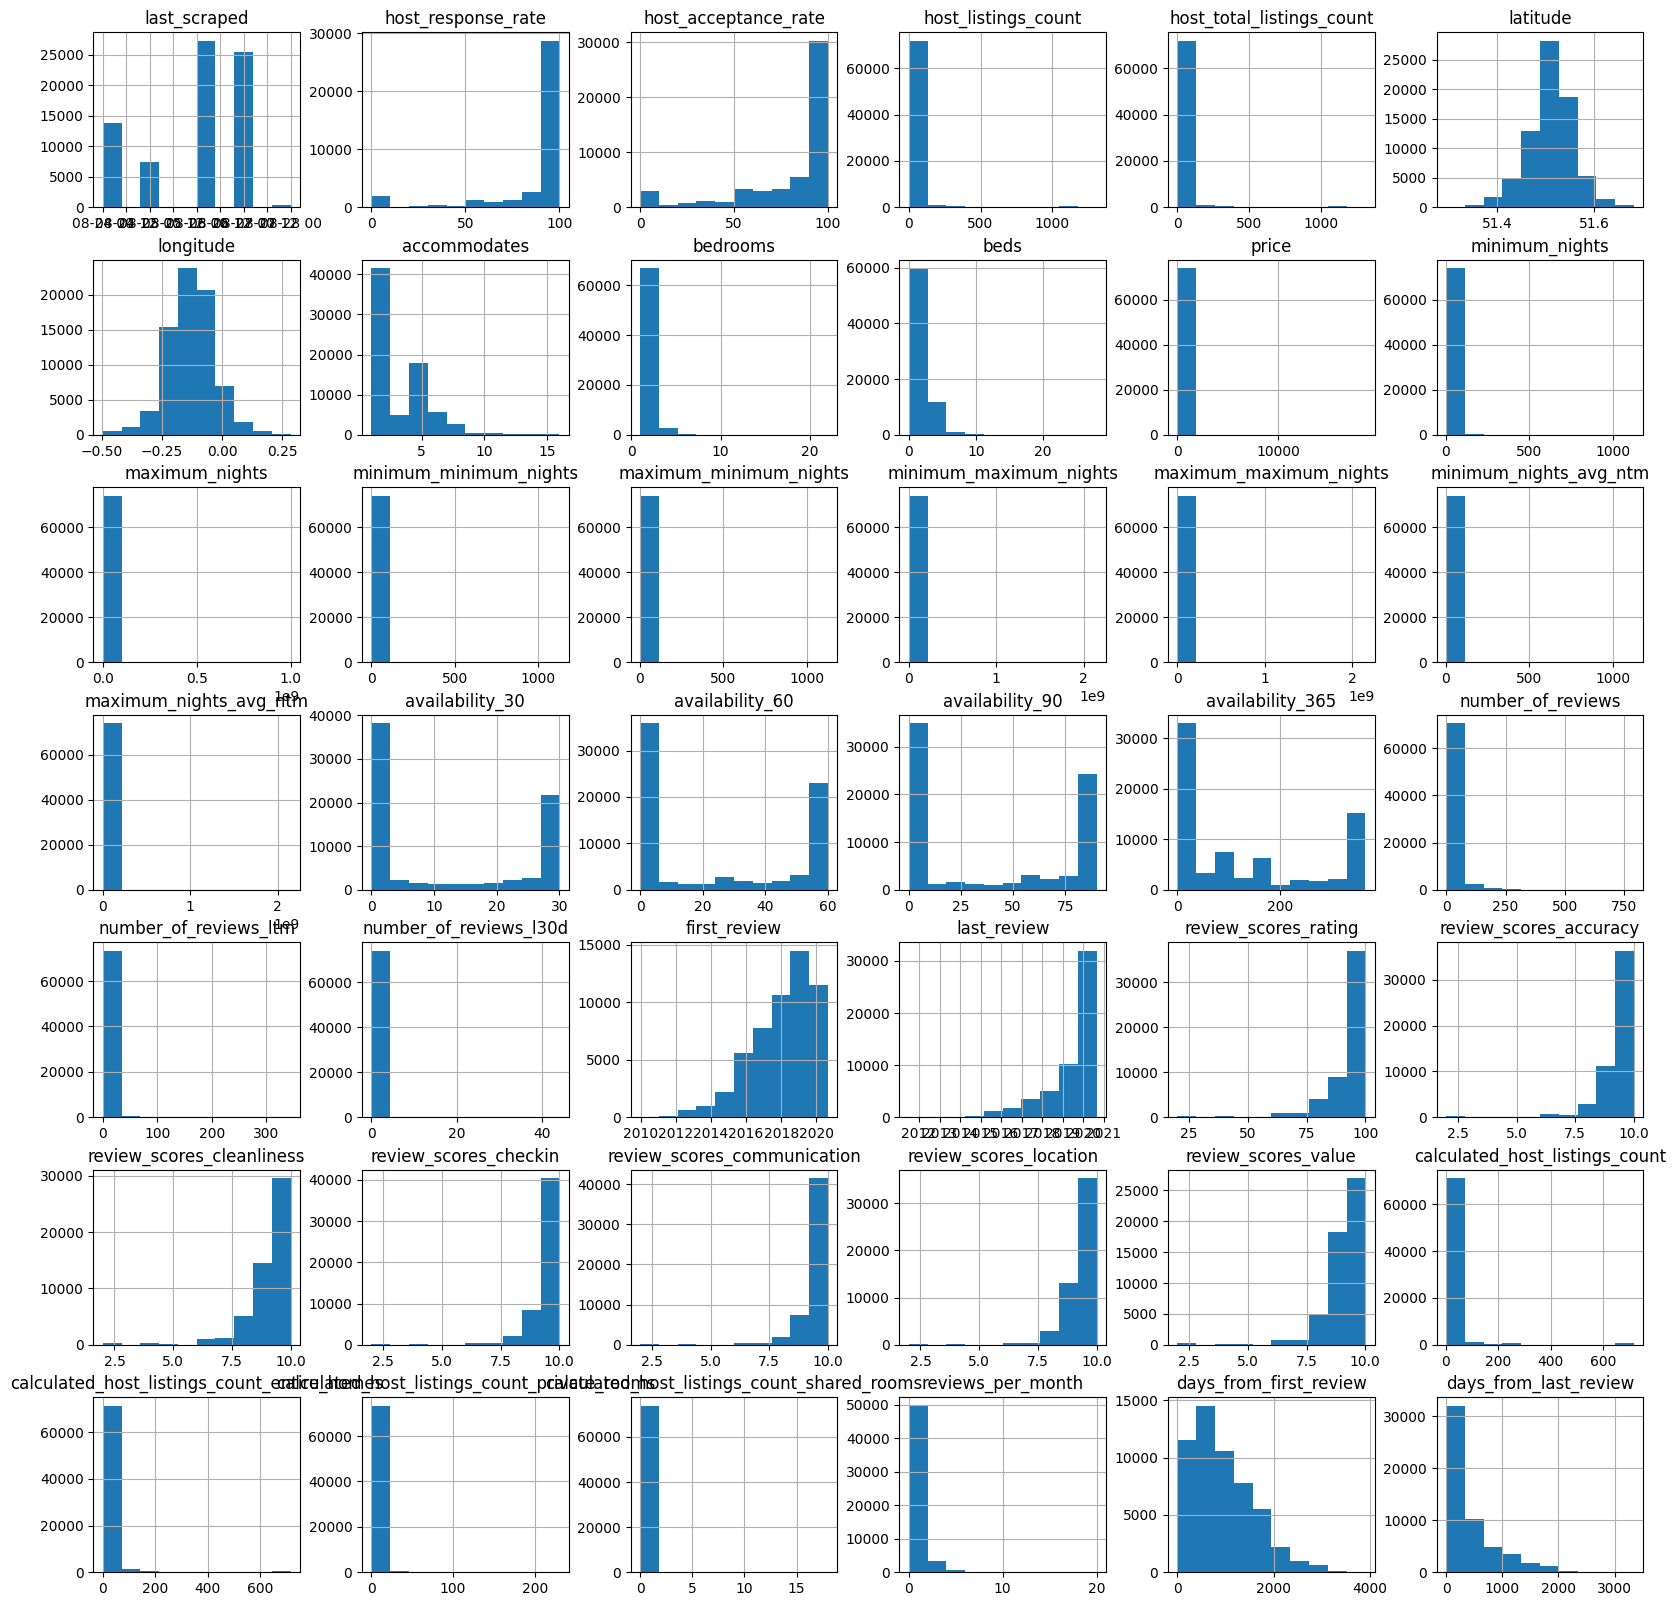

In [117]:
df.hist(figsize=(20,20));
#generates histograms for each numeric column in the DataFrame df. A histogram is a type of bar chart that represents the frequency distribution of a set of numerical data

In [118]:
df = df[df['price'] > 0]

<Axes: xlabel='price'>

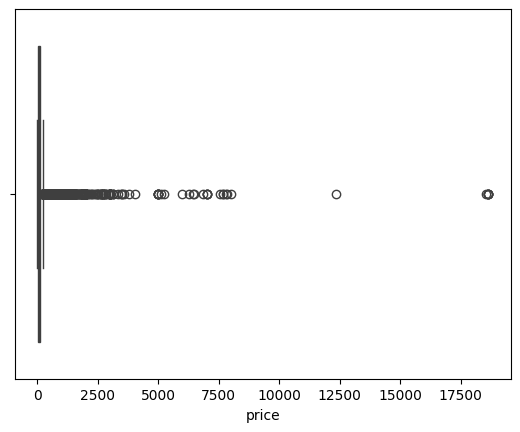

In [121]:
sn.boxplot(x=df['price']) #box plot helps quickly understand the central tendency, spread, and outliers in the price data, providing valuable insights into its distribution.

In [122]:
#quantile gives a sense of the upper range of the price data and can be useful for detecting extreme values or understanding the data's distribution.

In [125]:
df['price'].quantile(0.995) # Calculates the 99.5th percentile value of the price column, indicating the price value below which 99.5% of the prices fall.

np.float64(1000.0)

In [129]:
max_price = np.exp( np.log(df['price']).mean() +  (2 * np.log(df['price']).std()) )
print(max_price) #estimate a value for the maximum price, assuming the price data follows a log-normal distribution

392.367403900904


In [130]:
min_price = np.exp( np.log(df['price']).mean() -  (2 * np.log(df['price']).std()))
print(min_price)

16.203229252510067


In [131]:
#This approach is useful for making inferences about the distribution of prices, particularly when dealing with skewed data and extreme values

In [132]:
# How much of the data will we use after outliers are removed? deviation/extreme values
len(df[(df['price'] > min_price) & (df['price'] < max_price) ]) / len(df)

0.959773523860879

In [133]:
# Remove outliers 
df = df[(df['price'] > min_price) & (df['price'] < max_price) ]

In [138]:
df['host_total_listings_count'].isnull().sum()

np.int64(9)

In [139]:
# remove rows that have nulls
df = df[df['host_total_listings_count'].notnull()]

In [143]:
#calculates the correlation matrix for numeric columns in a DataFrame, extracts the correlations with the price column, and sorts them in descending order. This allows for the identification of which numeric features have the strongest relationships with price, providing valuable insights for analysis and modeling.

In [142]:
numeric_cols = df[num_cols].select_dtypes(include=[np.number]).columns
corrMatrix = df[numeric_cols].corr()
corrMatrix['price'].sort_values(ascending=False)

price                                           1.000000
accommodates                                    0.606037
bedrooms                                        0.565356
beds                                            0.487762
calculated_host_listings_count_entire_homes     0.280193
calculated_host_listings_count                  0.245877
host_total_listings_count                       0.231051
host_listings_count                             0.231051
availability_365                                0.098634
availability_30                                 0.057758
availability_60                                 0.056014
availability_90                                 0.054208
maximum_minimum_nights                          0.023929
maximum_maximum_nights                          0.020633
maximum_nights_avg_ntm                          0.020629
minimum_nights_avg_ntm                          0.018637
minimum_maximum_nights                          0.017292
minimum_minimum_nights         

In [144]:
analysis of areas using price
cols = ['neighbourhood_cleansed','price' ]
pd.DataFrame(df[cols].groupby(['neighbourhood_cleansed'])['price'].median().sort_values(ascending=False)).head()

,price
neighbourhood_cleansed,
City of London,125.0
Kensington and Chelsea,120.0
Westminster,114.0
Camden,90.0
Hammersmith and Fulham,85.0


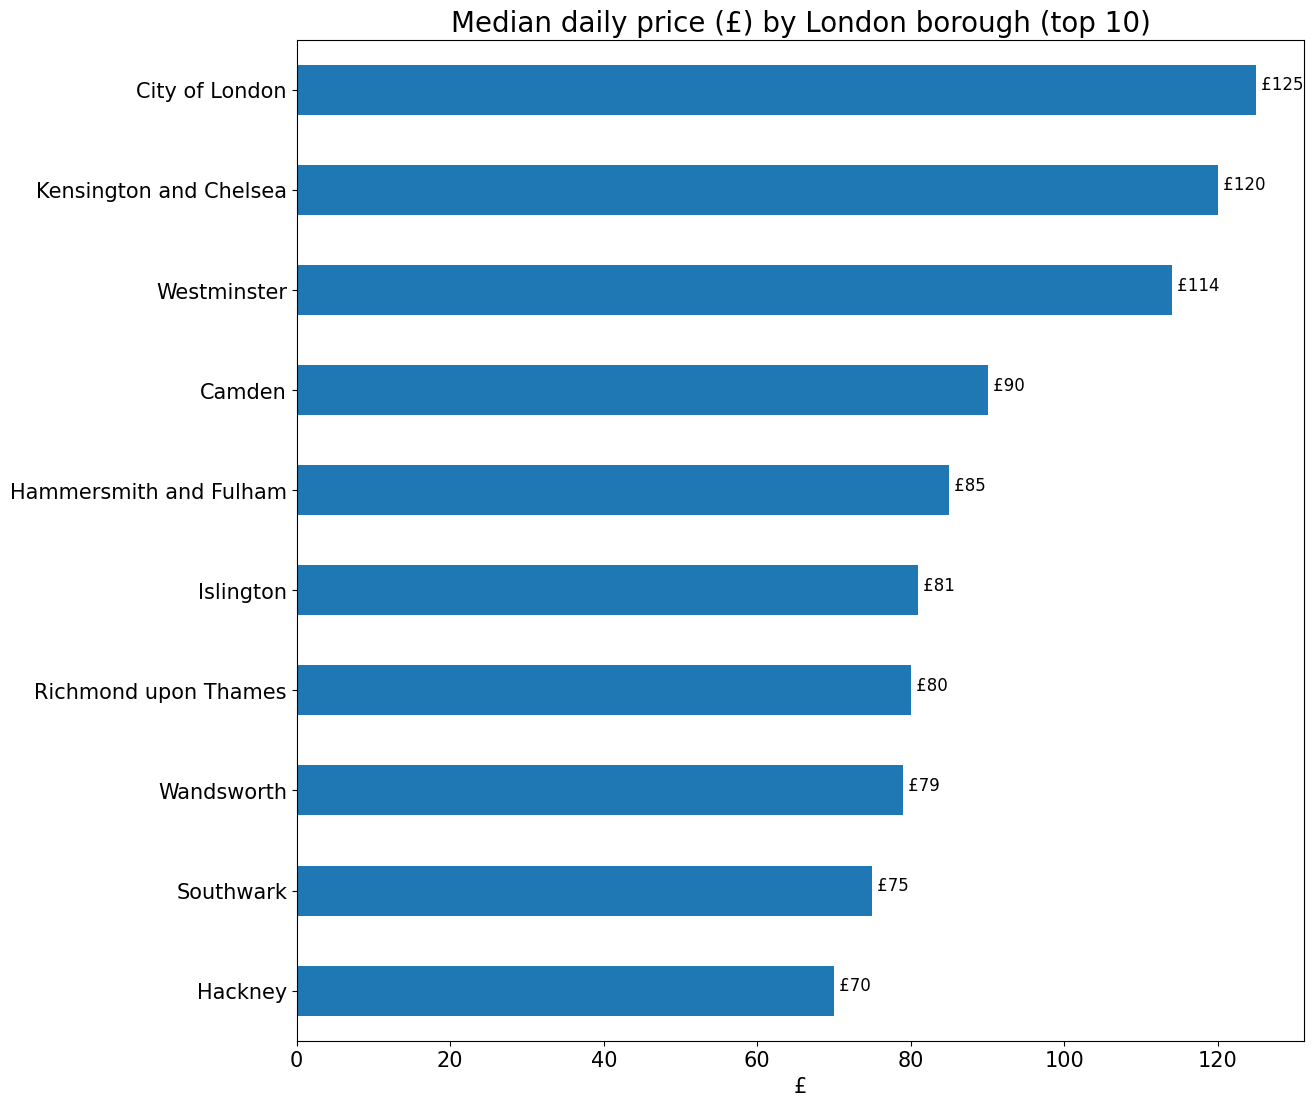

In [145]:
#uisng bargraph analysis
cols = ['neighbourhood_cleansed','price' ]
fig, ax = plt.subplots(figsize=(13,13)) 
df_chart = df[cols].groupby(['neighbourhood_cleansed'])['price'].median().sort_values(ascending=True).tail(10)
df_chart.plot(kind='barh')
plt.ylabel('')
plt.xlabel('£', fontsize=15)
plt.title('Median daily price (£) by London borough (top 10)', fontsize=20 )
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

for index, value in enumerate(df_chart.values.astype(int)):
    plt.text(value, index, " £" + str(value), fontsize=12 )


plt.show()

In [146]:
#amenities prices
amenities_set = set()

for row in df['amenities']:
    amenities_set.update(set(eval(row)))

In [147]:
len(amenities_set)

101

In [150]:
for amenity in amenities_set:
    df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in x  else 0 )

In [152]:
amenities_list = list(amenities_set)
print_all(df[amenities_list].sum().sort_values(ascending=False))


Wifi                          68130
Heating                       67214
Essentials                    65988
Kitchen                       64420
Smoke alarm                   61612
Washer                        60584
Hangers                       56264
Iron                          53848
TV                            49049
Hair dryer                    48700
Shampoo                       46670
Laptop-friendly workspace     44065
Carbon monoxide alarm         42439
Hot water                     41211
Dryer                         31170
Refrigerator                  30969
Dishes and silverware         30091
Oven                          27149
Cooking basics                26554
Microwave                     25843
Bed linens                    25840
Stove                         24632
Fire extinguisher             22931
First aid kit                 22534
Private entrance              17457
Dishwasher                    16920
Coffee maker                  16276
Long term stays allowed     

In [153]:
# Only a few cases of nulls so removing for Linear Regression to work
df = df[df['host_total_listings_count'].notnull()]

In [154]:
# Remove columns not needed for modelling

# high nulls and no correlation to price
num_cols.remove('host_response_rate')
num_cols.remove('host_acceptance_rate')

# not going to be useful
num_cols.remove('latitude')
num_cols.remove('longitude')
cat_cols.remove('amenities')

In [155]:
### Only price and accommodates seem to be log normal so only going to transform these
df['price'] = np.log(df['price'])
df['accommodates'] = np.log(df['accommodates'])

In [156]:
#Data Modeling using Linear Regression
#Linear regression is a fundamental technique in data modeling and statistics used to model the relationship between a dependent variable and one or more independent variables. 

In [158]:
#Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events.
#It is a statistical method used in data science and machine learning for predictive analysis.